# Machine Learning | Assignment 2

## Retireving and Preparing the Data

### Importing Libraries 

In [3]:
import pandas as pd

### About this dataset

The dataset consists of 27x27 RGB images of colon cells
from 99 different patients.
The purpose is to classify and identify whether given cell image represents a cancerous cells or not (isCancerous).
And to classify cell-type, such as: fibroblast, inflammatory,
epithelial or others.


## Loading the Image Classification Data set

In [4]:
dataLabelsFrame = pd.read_csv ('Image_classification_data\data_labels_mainData.csv')

**Features Explained**

- Instance ID:
- Patient ID: The pateints unique identifier number (Integer)
- Image Name: Name of each cell image
- CellTypeName: Name of each cell type (string)
- CellType: Group under which each cell classifies under (integer)
- isCancerous: If the patient has cancerous cells or not (boolean) 


In [23]:
dataLabelsFrame.head(10)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [6]:
dataLabelsFrame.shape

(9896, 6)

There are 9896 rows in the dataset and 6 features (including the target feature)

In [7]:
dataLabelsFrame.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [8]:
dataLabelsFrame.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


### Missing values

In [9]:
dataLabelsFrame.isna().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

There are no missing values in this dataset

## Data Exploration
### Importing Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Here we will explore
- 1. cellTypeName
- 2. cellType
- 3. isCancerous

### Exploring cellTypeName

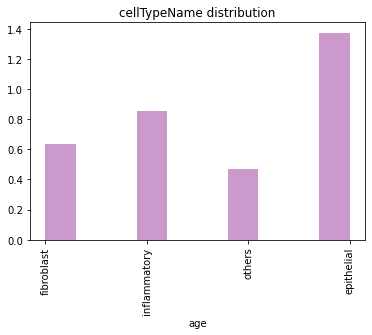

In [11]:
plt.hist(dataLabelsFrame['cellTypeName'], alpha=0.4, color='purple', density=True, rwidth = 2)
plt.title('cellTypeName distribution')
plt.ylabel('')
plt.xlabel('age')
plt.xticks(rotation='vertical')
plt.show()

### Observation

- The highest cell type in the distribution are the epithelial
- Second goes inflamatory cells, then fibroblast and others

## Exploring cellType

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

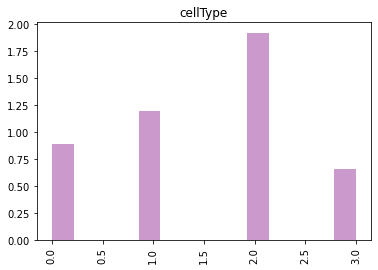

In [12]:
plt.hist(dataLabelsFrame['cellType'], alpha=0.4, color='purple', density='True', bins =14)
plt.title('cellType')
plt.xticks(rotation='vertical')

**Observation**
- There is a higher distribution of cell type 2
- CellType 3 seems to be the lowest in the distibution

## Exploring isCancerous

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

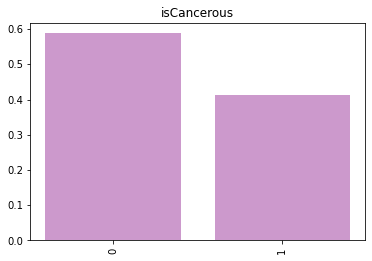

In [13]:
plt.bar(dataLabelsFrame['isCancerous'].value_counts().index.astype(str),
       dataLabelsFrame['isCancerous'].value_counts().values/np.sum(dataLabelsFrame['isCancerous'].value_counts().values),
       alpha=0.4, color='purple')
plt.title('isCancerous')
plt.xticks(rotation='vertical')

**Obervations**
- There seem to be more cells that are cancer free according to the data
- More than 50% of the cells in the images are cancerous

## Preparing and splitting the data


In [66]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataLabelsFrame, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 6332, Val Data: 1584, Test Data: 1980


Two of the choices are made for us by the data.
From our dataset we know that the images are 27x27 and therefore there will be 27x27x3 features and for our Cancer classification model there will be two classes, so the input layer must have 2187 units, and the output layer must have 2 units.
We're going to start with one hidden layer for this model, and we'll give it 256 nodes/neurons/units.

## Building the Base Model

We'll be using Keras and Tensorflow to build our model

### Setting up the layers

In [67]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

We'll be using the Sequential API

In [68]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 27 by 27 pixels) to a one-dimensional array (of 27 * 27 * 3 = 2352 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected (MLP), neural layers. The first Dense layer has 256 nodes (or neurons). The second (and last) layer returns a logits array with length of 2. Each node contains a score that indicates the current image belongs to one of the 2 classes.

We can use `model.summary()` to print the model that was created.

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2187)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               560128    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


Observing our model as a figure

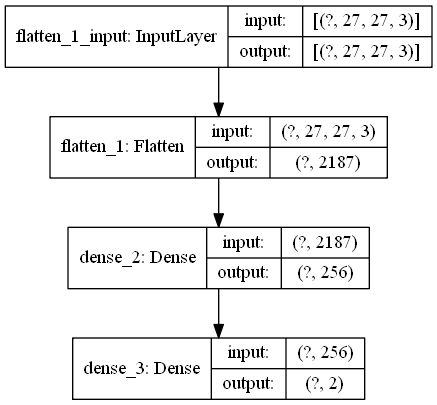

In [70]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Compiling the model
Before the model is ready for training, it needs parameters that are added during the model's compile step:

- **Loss function**: To measures how accurate the model is during training
- **Optimizer**: This is how the model is updated based on the data it sees and its loss function.
- **Metrics**: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [71]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['categorical_accuracy'])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=tf.keras.metrics.binary_accuracy(
#     y_true, y_pred, threshold=0.5
# ))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics='binary_accuracy')

In [77]:
train_data['ImageName']

2078    15819.png
6584     9964.png
4300    20129.png
471       298.png
2558    17532.png
          ...    
7872     5524.png
5624    11996.png
401       224.png
3394     1071.png
9349    16857.png
Name: ImageName, Length: 6332, dtype: object

We are using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient descent and accuracy metrics will be collected when the model is trained.


### Data Loader

We will be using the `flow_from_dataframe` function in the keras data loader to load a set of images directly from a pandas data frame (the data frame contains the image names (path) and the labels)

In [88]:
train_data["isCancerous"] = train_data["isCancerous"].astype(str)
val_data["isCancerous"] = val_data["isCancerous"].astype(str)

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary')

Found 6332 validated image filenames belonging to 2 classes.
Found 1584 validated image filenames belonging to 2 classes.


Normalizing pixels from a range of 0-225 to 0-1

### Model Training
Next we can train the model using model.fit() . The training is done in the fit function. Since we have already setup a data generator, we can use the fit_generator to do the training. 

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=150, verbose=0)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'], 'r--')
plt.plot(history.history['val_binary_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()